<h2 style="color:blue" align="center">Tensorboard demo using handwritten digits classification using neural network</h2>

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [14]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [15]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [16]:
len(X_train)

60000

In [17]:
len(X_test)

10000

In [18]:
X_train[0].shape

(28, 28)

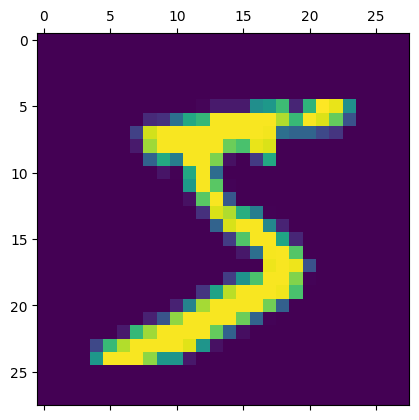

In [19]:
plt.matshow(X_train[0])

In [20]:
y_train[0]

5

In [21]:
X_train = X_train / 255
X_test = X_test / 255

In [22]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [23]:
X_train_flattened.shape

(60000, 784)

<h3 style='color:purple'>Using Flatten layer so that we don't have to call .reshape on input dataset</h3>

In [24]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

model.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8715 - loss: 0.4540
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9636 - loss: 0.1269
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9739 - loss: 0.0845
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9811 - loss: 0.0634
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9849 - loss: 0.0496


In [25]:
#%load_ext tensorboard
#%tensorboard --logdir logs/fit

# if we use these to above command we can see the tensorboard in jupyter notebook

#but if we use this command in terminal we can see the tensorboard in browser
# tensorboard --logdir logs/ and we prefer to use this command

Either run above inline magic or go to git bash or your command prompt and type below to run it,
`tensorboard --logdir logs/`
This will launch tensorboard at this url which you can open in your browser `http://localhost:6006/`

In [26]:
model.get_weights()

[array([[-0.06120357, -0.01789742,  0.05677536, ...,  0.06864882,
          0.06332006, -0.04400551],
        [ 0.06891268,  0.0579648 ,  0.07527302, ...,  0.07326032,
         -0.03278627,  0.03131945],
        [ 0.04469644,  0.06686275,  0.00629019, ...,  0.03616708,
         -0.04385255,  0.00280064],
        ...,
        [-0.01529892, -0.01062269,  0.0690698 , ...,  0.03541003,
          0.06934546,  0.00918023],
        [-0.01624854,  0.03707669, -0.07150181, ..., -0.07386865,
         -0.01294775,  0.06684875],
        [ 0.06191009,  0.03776774, -0.07563359, ..., -0.03610878,
          0.04431532, -0.07036863]], dtype=float32),
 array([-0.0585635 , -0.03134879, -0.02329326,  0.02364401,  0.08184721,
         0.02221224, -0.12536304, -0.11235888,  0.08507391,  0.11155903,
        -0.00438776,  0.08411661,  0.02476235,  0.03816937,  0.09285065,
         0.07913869,  0.05822065,  0.01795954,  0.05660965,  0.04549098,
         0.00232608,  0.03398034, -0.14089972,  0.06645981, -0.061